# COGS 108 - Final Project (Relationship Between Railroad Accidents and Weather Conditions)

Please use collection time: Friday

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [ ] NO - keep private

# Names

- Haiqi Zhang
- Jiayi Dong
- Yuqin Zhang
- Sixian Li
- Kevin Zhou

# Overview

In this project, we aimed to explore the relationship between weather conditions and railway accidents, with the ultimate goal of improving safety, optimizing operations, and reducing financial losses. We investigated various factors that could potentially influence railway accident rates and employed a range of visualization techniques learned in class to represent our findings. Our study revealed that weather conditions at the time of the accident do indeed have a significant impact on railway accidents. Notably, we found that foggy conditions contribute to a higher frequency of accidents compared to other weather scenarios. Interestingly, we also discovered that clear days exhibit increased accident rates, which may be attributed to trains being more likely to operate under such conditions.

<a id='research_question'></a>
# Research Question

- General question: What are the correlations between railway accidents and the weather conditions near the sites where these accidents take place? What are some other factors that plays an effect in these accidents?
    - are accidents more likely to happen during severe weather?
    - is there a specific temperature that has higher railway accidents rate?
    - is there a specific time in the day that has higher railway accidents rate? (we think time is also a factor of weather since different times in the day have differnt weather condition)
    - is visibility also a factor that relates to railway accidents rate?
    - is there a correlation between high and low damage cost accidents and the current weather conditions? 
    

<a id='background'></a>

## Background & Prior Work

After seeing reports on the 2023 Ohio train derailment accident that took place on Feb 3rd, when a 150-car train derailed and exploded, releasing a massive amount of hazardous chemicals, including vinyl chloride, benzene residue, and butyl acrylate [^Guise], it has come to our attention that railway accidents have not been frequently covered in the news in the U.S.. After doing some initial research, we found out that approximately 10 railroad accidents take place every decade in America. We are interested in exploring why these accidents happen and whether there are any correlations among the causes. To do this, our group will look up datasets that feature the time of day, location, temperature, and visibility around the time these accidents happen, and look to see if there are any correlations between these environmental factors and the damage those accidents cause. We will be using the percentage of train accidents and incidents on a specific type of weather(ex: rainy, windy), rather than a total count of accidents, and compare that to the data of other types of weather days. This is due to the consideration that some states may be siginificantly sunnier than they are rainy.

Some relevant previous works we found include an essay by M.A. Rosetti [^Rosetti], in which the author notes that railroads are vulnerable to extreme weather events such as floods, hurricanes, and wildfires, which can damage tracks, bridges, and other infrastructure. In addition, rising temperatures can cause rails to expand and buckle, while changes in precipitation patterns can increase the risk of landslides and other hazards. Another research article [^Fu&Easton]  evaluates the accuracy of the predictions of train delays made by a data model they developed, focusing on wind-related data.

References：

1. [^Guise]: Guise, Michael. "Train derailment causes massive fire in East Palestine, Ohio". CBS News. Archived from the original on February 18, 2023. Retrieved March 05, 2023.

2. [^Rosetti]: Rossetti, M. A. (2019). The Impact of Railroads on the Development of the United States. U.S. Department of Transportation. https://www.transportation.gov/sites/dot.gov/files/docs/rossetti_CC_Impact_Railroads.pdf

3. [^Fu&Easton]: Fu, Q., & Easton, N. H. C. (2015). Prediction of weather-related incidents on the rail network: Prototype data model for wind-related delays in Great Britain. Journal of Transportation Engineering, 141(4), 04014092. doi: 10.1061/(ASCE)TE.1943-5436.0000639


# Hypothesis


We hypothesize that there is a possitive correlation between the happening of railroad accidents and extreme weather. Extreme weather includes foggy, snowy, high temperature (over 100F), and low temperature (under 32F) days. In other words, railroad accidents and incidents are less likely to take place on clear days that are warm and cool. We believe this would be the outcome based on the fact that it is more likely for car accident to happen during extreme weather.

# Dataset(s)

- Dataset Name: **Railroad Accident & Incident Data**
- Link to the dataset: https://www.kaggle.com/datasets/chrico03/railroad-accident-and-incident-data
- Number of observations: 215848

This dataset recorded railroad accidents accross the country from 1975 to 2022, with 160 features including details like weather, date, specific times, number of people injured, damage costs, etc.It is reliable since it has a license that said "Copyright Exceptions for U.S. Government Works." Thus, we assume that this dataset use governmental reports of railway accidents.\
However, too many features is not always a good things. We will need to select the range of years and specific features that are useful for our project in data cleaning part.

- Dataset Name: **Weather data for 50 states in U.S. in year 2000, 2005, 2010, 2015, 2020**
- Link to the dataset: https://www.visualcrossing.com/weather/weather-data-services
- Number of observations: 91350

These five datasets recorded weather events over 5 years around all states of America.\
We only have the access to these five years becuase it is not a free dataset.

- Dataset Name:**Daily Temperature of Major Cities**
- Link: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities
- Number of observations: 1455337

This datasets recorded the avrage daily temperature for the major cities across US from 1995 to 2020\
The average daily temperature from 2000 and after will be used to compare with the temperature for those days when those accidents happened to check if a specific temperature that has higher railroad accidents frequency.

# Setup

In [5]:
# import pandas & numpy library
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

# Data Cleaning & Pre-processing

#### How are we going to combine and use these datasets

Based on the fact that different states have different weather conditions: some states rain more than others. We cannot use the number of each type of weather events to evaluate the relationship between weather events and railroad accidents. Instead, we choose to look at the percentage of each type of weather within each year. For instance, when looking at data from California, we need to find out how many days it rains in California each year, and divide the number of accidents that happen on rainy days that year by the number of days that rain in California. Then we can calculate the percentage of accidents that happen in rainy days. To do this, we need to find weather data of each states. It is extremely difficult for us to find 23 years of weather data for each state; therefore, we find 5 years weather data throughout the country, and we will use these data to find out the average number of different types of weather events, and use this average number to calculate the percentage. Similar to weather data, we need percentages of temperature instead of number of temperature as well.

#### Import

- Import railroad accidents data

In [6]:
filepath = "Rail_accident_datasets/Rail_Equipment_Accident_Incident_DataSet_"
rail_accident_df_1 = pd.read_csv(filepath + "Part1.csv", low_memory=False)
rail_accident_df_2 = pd.read_csv(filepath + "Part2.csv", low_memory=False)
rail_accident_df_3 = pd.read_csv(filepath + "Part3.csv", low_memory=False)
rail_accident_df_4 = pd.read_csv(filepath + "Part4.csv", low_memory=False)
rail_accident_df_5 = pd.read_csv(filepath + "Part5.csv", low_memory=False)

# Merging into one rail accident dataframe
frames = [rail_accident_df_1, rail_accident_df_2, rail_accident_df_3, rail_accident_df_4, rail_accident_df_5]
railroad_raw = pd.concat(frames)

- Import weather data

In [7]:
weather_data_2000 = "weather_datasets/2000.csv"
weather_2000 = pd.read_csv(weather_data_2000)

weather_data_2005 = "weather_datasets/2005.csv"
weather_2005 = pd.read_csv(weather_data_2005)

weather_data_2010 = "weather_datasets/2010.csv"
weather_2010 = pd.read_csv(weather_data_2010)

weather_data_2015 = "weather_datasets/2015.csv"
weather_2015 = pd.read_csv(weather_data_2015)

weather_data_2020 = "weather_datasets/2020.csv"
weather_2020 = pd.read_csv(weather_data_2020)

# Merging into one weather dataframe
frames = [weather_2000, weather_2005, weather_2010, weather_2015, weather_2020]
weather = pd.concat(frames)

- Import temperature data

In [8]:
temp_raw = pd.read_csv('us_temperature.csv')

#### Cleaning

- Extract columns that are related to our research questions

In [9]:
Railroad = railroad_raw [['Date', 'Time','Accident Type', 'State Abbreviation', 
                       'Temperature', 'Weather Condition', 'Visibility', 
                       'Total Damage Cost','Accident Cause Code','Primary Accident Cause',
                        'Total Persons Injured', 'Latitude', 'Longitude']]

- Remove redundent row and dropna from the railroad accidents df

In [10]:
railroad_cleaned = Railroad.dropna().drop_duplicates()

- Extract railraod accidents from year 2000 to 2022

In [11]:
railroad_cleaned['Year'] = pd.to_datetime(railroad_cleaned['Date']).dt.year
railroad_cleaned['Year'] = railroad_cleaned['Year'].astype(int)

In [12]:
railroad_cleaned = railroad_cleaned[railroad_cleaned['Year']>=2000]
railroad_cleaned.reset_index(drop=True, inplace=True)
railroad_cleaned.head()

,Date,Time,Accident Type,State Abbreviation,Temperature,Weather Condition,Visibility,Total Damage Cost,Accident Cause Code,Primary Accident Cause,Total Persons Injured,Latitude,Longitude,Year
0,06/06/2017,2:14 PM,Derailment,IL,65.0,Clear,Day,"132,013",T314,Switch point worn or broken,0.0,41.884035,-87.623003,2017
1,01/11/2007,7:10 AM,Derailment,LA,56.0,Cloudy,Day,"9,986",T311,Switch damaged or out of adjustment,0.0,0.000000,0.000000,2007
2,10/07/2017,3:55 AM,Hwy-rail crossing,IL,66.0,Clear,Dark,"13,231",M308,Highway user deliberately disregarded crossing...,1.0,41.054254,-87.906206,2017
3,10/15/2017,6:00 AM,Derailment,IL,60.0,Rain,Dawn,"148,289",H306,"Shoving movement, absence of man on or at lead...",0.0,41.122308,-87.900664,2017
4,12/04/2017,7:57 PM,Obstruction,IL,62.0,Cloudy,Dark,"15,061",M404,Object or equipment on or fouling track - othe...,0.0,41.267569,-88.207738,2017


- Unify weather events in both datasets
    - for railroad data, change 'Sleet' to 'Snow'
    - for weather data, change 'partly-cloudy-day' to 'Cloudy', 'rain' to 'Rain', 'clear-day' to 'Clear', 'snow' to 'Snow', 'cloudy' to 'Cloudy', 'wind' to 'Cloudy', 'fog' to 'Fog'

In [13]:
railroad_cleaned = railroad_cleaned.replace('Sleet', 'Snow')

In [14]:
w = weather.replace({'icon': {'partly-cloudy-day': 'Cloudy', 'rain': 'Rain',
                             'clear-day': 'Clear','snow':'Snow','cloudy':'Cloudy',
                             'wind':'Cloudy','fog':'Fog'}})
w.head()

,name,datetime,conditions,description,icon
0,NH,2000-01-01,Partially cloudy,Clearing in the afternoon.,Cloudy
1,NH,2000-01-02,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,Rain
2,NH,2000-01-03,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,Rain
3,NH,2000-01-04,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,Rain
4,NH,2000-01-05,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,Rain


- Divide weather events by each states in weather df

In [15]:
w['count'] = 1
states_weather = w.groupby(['name','icon']).count()['count'].reset_index()
states_weather.rename(columns = {'name':'State','icon':'Weather','count':'Weather_count'},inplace = True)
states_weather.head()

,State,Weather,Weather_count
0,AK,Clear,65
1,AK,Cloudy,597
2,AK,Fog,1
3,AK,Rain,1058
4,AK,Snow,106


- Divide weather events by each states in railroad df

In [16]:
railroad_cleaned['count'] = 1
railroad_states = railroad_cleaned.groupby(['State Abbreviation','Weather Condition']).count()['count'].reset_index()
railroad_states.rename(columns = {'State Abbreviation':'State','Weather Condition':'Weather',
                                  'count':'Accident_count'},inplace = True)
railroad_states

,State,Weather,Accident_count
0,AK,Clear,27
1,AK,Cloudy,14
2,AK,Fog,2
3,AK,Rain,3
4,AK,Snow,5
...,...,...,...
242,WY,Clear,447
243,WY,Cloudy,195
244,WY,Fog,5
245,WY,Rain,24


- Add a column on the `railroad_states` dataset. The column is the number of each weather event happened in a certain state

In [17]:
merged = railroad_states.merge(states_weather,how = 'left',on = ['State','Weather'])
merged.head()

,State,Weather,Accident_count,Weather_count
0,AK,Clear,27,65.0
1,AK,Cloudy,14,597.0
2,AK,Fog,2,1.0
3,AK,Rain,3,1058.0
4,AK,Snow,5,106.0


- We found that there is no railway in Hawaii, and the original weather dataset did not have DC as a state; therefore, we remove these two states from our `merged` dataset  

In [18]:
merged = merged[(merged["State"] != 'DC') & (merged["State"] != 'HI')].dropna()
merged['Weather_count'] = (merged['Weather_count']*(23/5)).astype(int)

- Calculate the chance of accident for each weather event in each state by dividing the `Accident_count` column with the `Weather_count` column

In [19]:
merged['Chance of Accident'] = 100*merged['Accident_count']/merged['Weather_count']
merged.head()

,State,Weather,Accident_count,Weather_count,Chance of Accident
0,AK,Clear,27,299,9.030100
1,AK,Cloudy,14,2746,0.509832
2,AK,Fog,2,4,50.000000
3,AK,Rain,3,4866,0.061652
4,AK,Snow,5,487,1.026694


- Collect datasets of each weather event

In [20]:
snow = merged.loc[merged['Weather'] == 'Snow',:]

fog = merged.loc[merged['Weather'] == 'Fog',:]

clear = merged.loc[merged['Weather'] == 'Clear',:]

cloudy = merged.loc[merged['Weather'] == 'Cloudy',:]

rain = merged.loc[merged['Weather'] == 'Rain',:]

- Write a function that clean out the outliers in the `Chance of Accident` column by removing value that is 3 std away from this column's mean

In [21]:
def clean_weather_outlier(df):
    df_mean = df['Chance of Accident'].describe()[1]
    df_std = df['Chance of Accident'].describe()[2]
    df_new = df.loc[(df['Chance of Accident']>=df_mean-3*df_std)&(df['Chance of Accident']<=df_mean+3*df_std),:]
    return df_new

- Apply the function to each weather event dataset to eliminate outliers

In [22]:
snow_new = clean_weather_outlier(snow)

fog_new = clean_weather_outlier(fog)

clear_new = clean_weather_outlier(clear)

cloudy_new = clean_weather_outlier(cloudy)

rain_new = clean_weather_outlier(rain)

- Extract the temperature data after year 2000

In [23]:
temp_df = temp_raw[temp_raw['Year'] >= 2000][['State', 'City', 'Year', 'AvgTemperature']]
temp_df.head()

,State,City,Year,AvgTemperature
1826,Alabama,Birmingham,2000,59.0
1827,Alabama,Birmingham,2000,63.5
1828,Alabama,Birmingham,2000,67.0
1829,Alabama,Birmingham,2000,57.3
1830,Alabama,Birmingham,2000,36.0


- Plot the DataFrame to see if there are outliers in the temperature dataset

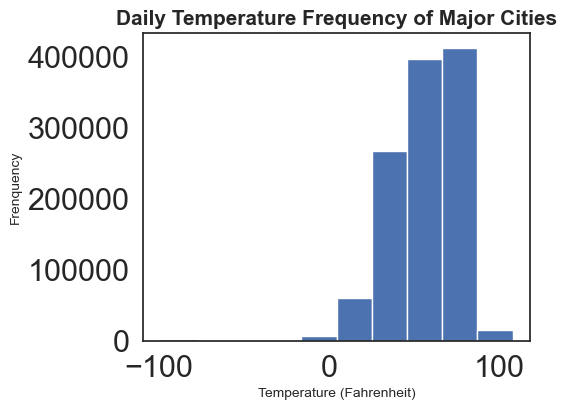

In [24]:
# generate the histogram
temp_df['AvgTemperature'].plot.hist(figsize=(5, 4));

# set up x,y axes names and graph title
plt.title('Daily Temperature Frequency of Major Cities',size = 15, fontweight="bold")
plt.xlabel('Temperature (Fahrenheit)',size = 10)
plt.ylabel('Frenquency',size = 10)
plt.show()

From graph above, we can see that there is some outliers from -100 to 0 Fahrenheit; therefore, we only use temperature that is above -20 Fahrenheit to eliminate those outliers.

- Remove extremely low temperature data

In [25]:
temp_df = temp_df[temp_df['AvgTemperature'] > -20]

- Plot the temperature histogram again to ensure deletion of outlier temperatures

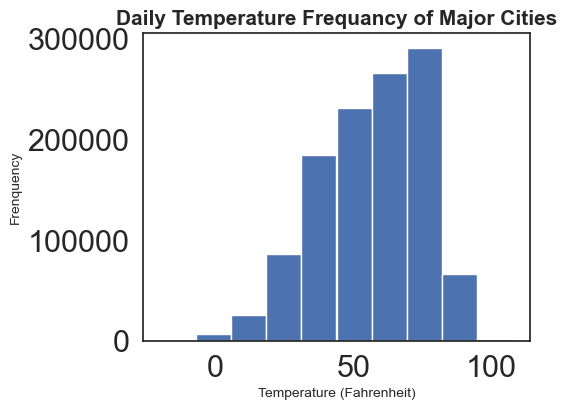

In [26]:
# generate the histogram
temp_df['AvgTemperature'].plot.hist(figsize=(5, 4))

# set up x,y axes names and graph title
plt.title('Daily Temperature Frequancy of Major Cities',size = 15, fontweight="bold")
plt.xlabel('Temperature (Fahrenheit)',size = 10)
plt.ylabel('Frenquency',size = 10)
plt.show()

# Data Analysis & Results

## Data Preview

### Check the spacial and temporal distribution of all railway accident data

In [27]:
# get the proper longitude and latitude data that locate within the US
position_cleaned = railroad_cleaned[(railroad_cleaned['Longitude']<-50) &
                                    (railroad_cleaned['Longitude']>-170) &
                                    (railroad_cleaned['Latitude']<70) &
                                    (railroad_cleaned['Latitude']>20)]

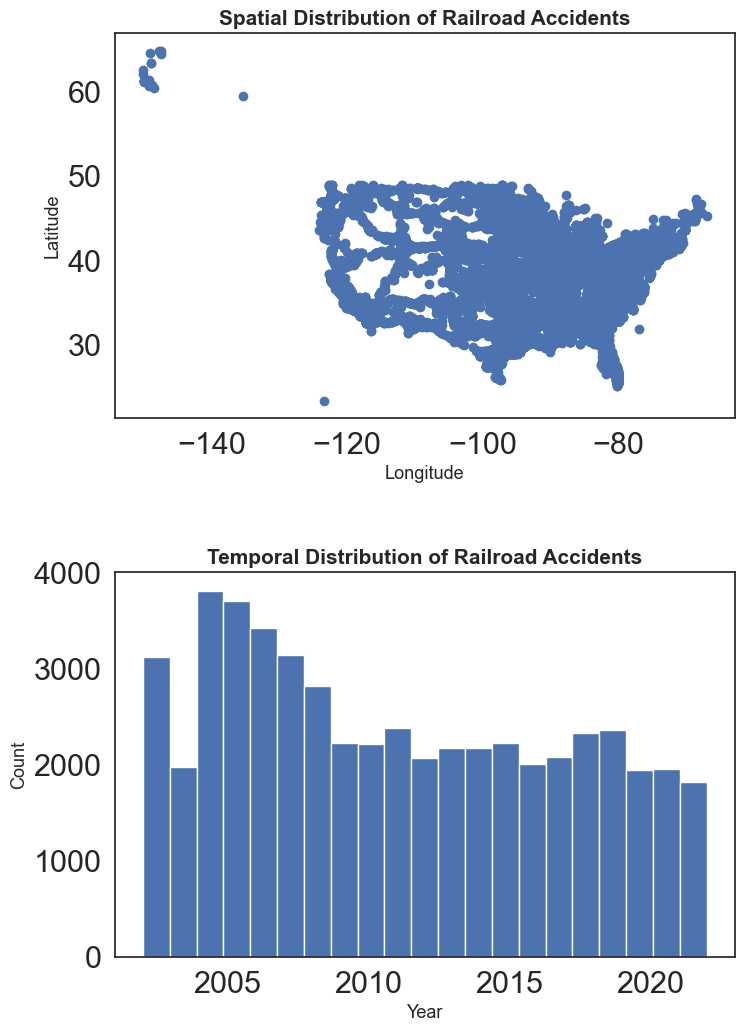

In [28]:
# generate the spatial and temperol distribution
fig, axs = plt.subplots(nrows=2, figsize=(8, 12))
axs[0].scatter(x=position_cleaned['Longitude'], y=position_cleaned['Latitude'])
axs[0].set_xlabel('Longitude', fontsize=13)
axs[0].set_ylabel('Latitude', fontsize=13)
axs[0].set_title('Spatial Distribution of Railroad Accidents',fontsize = 15, fontweight="bold")
axs[1].hist(railroad_cleaned['Year'],bins=21)
axs[1].set_xlabel('Year', fontsize=13)
axs[1].set_ylabel('Count', fontsize=13)
axs[1].set_title('Temporal Distribution of Railroad Accidents',fontsize = 15, fontweight="bold")
plt.subplots_adjust(hspace=0.4)

From these two graph above we now have a general understanding of our railroad accident data.

## Data Analysis

### Generate a boxplot that answer the subquestion: Are accidents more likely to happen during severe weather?

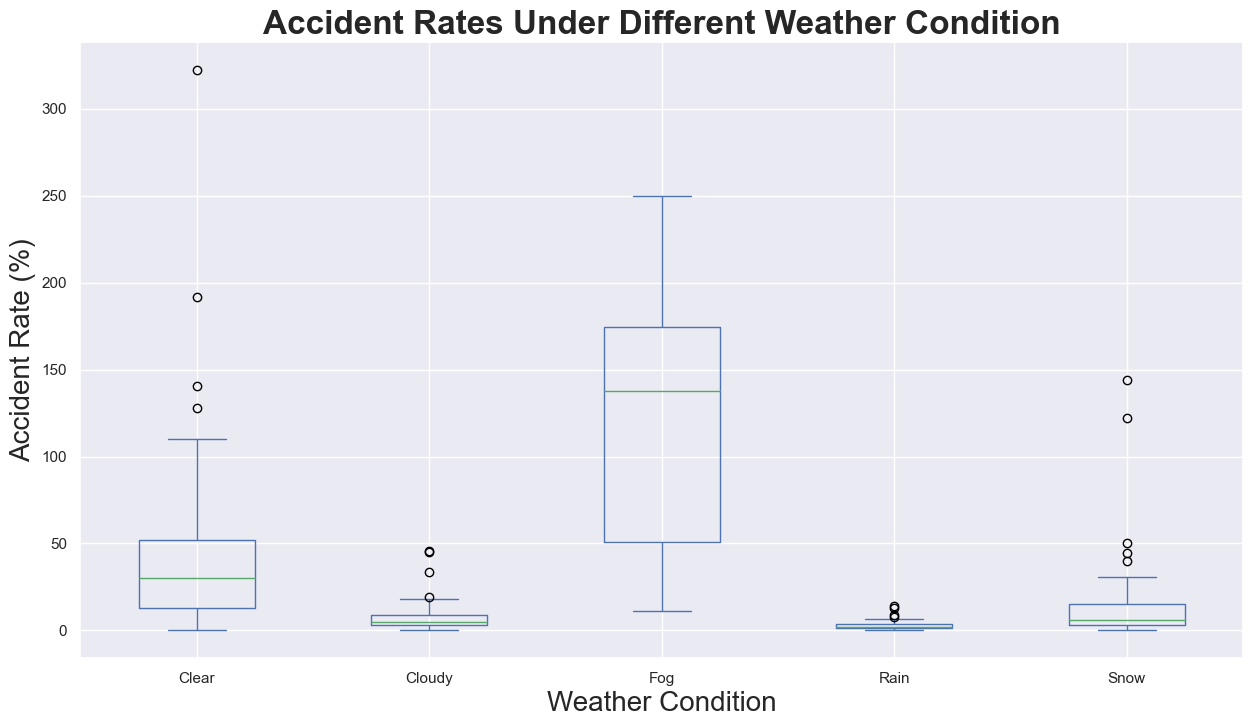

In [29]:
# change the size of the plot
sns.set(rc={'figure.figsize':(15,8)})

# grouped boxes of each weather condition
weather_box_data = pd.DataFrame({"Snow": snow_new['Chance of Accident'], 
                                 "Fog": fog_new['Chance of Accident'],
                                 "Clear": clear_new['Chance of Accident'],
                                 "Cloudy": cloudy_new['Chance of Accident'],
                                 "Rain": rain_new['Chance of Accident']})

# generate the boxplot
ax = weather_box_data[['Clear','Cloudy','Fog','Rain','Snow']].plot(kind='box')

# set up x,y axes and graph title
plt.title('Accident Rates Under Different Weather Condition',size  =24, fontweight="bold")
plt.xlabel('Weather Condition',size = 20)
plt.ylabel('Accident Rate (%)',size = 20)
plt.show()

- From the boxplot above, we found that fog has a significantly higher value of accident rate compared to other weather condition. However, we do need a `t-test` to furthermore confirm this result

- Conduct a `t-test`

In [30]:
cloudy_rate = cloudy_new['Chance of Accident']
rain_rate = rain_new['Chance of Accident']
snow_rate = snow_new['Chance of Accident']

# Combine accident rates of cloudy, rain, and snow into a single group
other_weather_rate = pd.concat([cloudy_rate,rain_rate,snow_rate])

# Perform t-tests
t_stat_fog, p_value_fog = ttest_ind(fog_new['Chance of Accident'], other_weather_rate)
t_stat_clear, p_value_clear = ttest_ind(clear_new['Chance of Accident'], other_weather_rate)

# Print the results
print("Fog vs. Other Weather")
print("t-statistic:", t_stat_fog)
print("p-value:", p_value_fog)

print("Clear vs. Other Weather")
print("t-statistic:", t_stat_clear)
print("p-value:", p_value_clear)

Fog vs. Other Weather
t-statistic: 13.15121902641278
p-value: 1.496338598184058e-26
Clear vs. Other Weather
t-statistic: 6.640829668323754
p-value: 3.405130687288847e-10


- For foggy days: p-value << 0.05. This means that we can reject the null hypothesis and conclude that there a significant difference between the accident rate on foggy days and the accident rates on cloudy, rainy, and snowy days.

- For clear days: p-value << 0.05. This means that we can reject the null hypothesis and, therefore, can conclude that there is a significant difference between the accident rate on clear days and the accident rates on cloudy, rainy, and snowy days.

### Generate bar graph answer the question: Are accidents more likely to happen during severe weather?

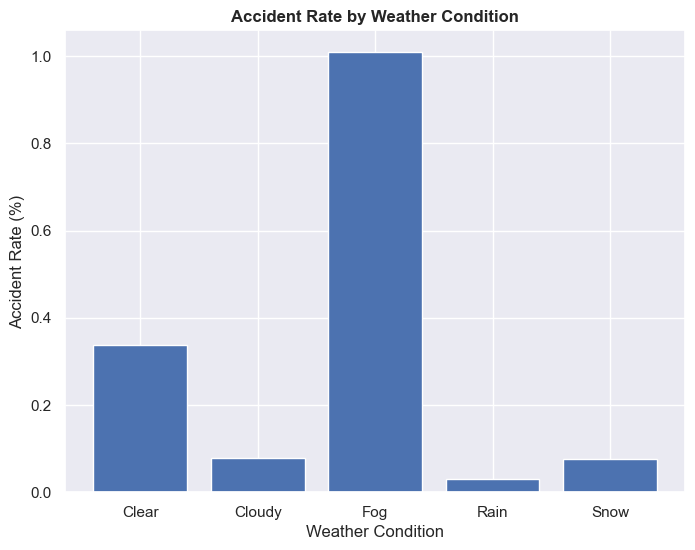

In [31]:
# calculate the accident rate for each weather condition
accidentRate = merged.groupby('Weather')[['Accident_count', 'Weather_count']].sum()
accidentRate['Accident_rate'] = accidentRate['Accident_count'] / accidentRate['Weather_count']

# change the size of the plot
sns.set(rc={'figure.figsize':(8,6)})

# generate the plot
plt.bar(accidentRate.index, accidentRate['Accident_rate'])

# set up x,y axes and graph title
plt.title('Accident Rate by Weather Condition',fontweight="bold")
plt.xlabel('Weather Condition')
plt.ylabel('Accident Rate (%)')
plt.show()

- This barplot matches the conclusion we had for the boxplot, that foggy days and clear days have much higher accident rate than other weather conditions. We do not need a `t-test` this time since the test results should be exactly the same as the above one.

### Generate histograms to answer the subquestion: Is there a specific temperature that has higher railroad accidents frequency?

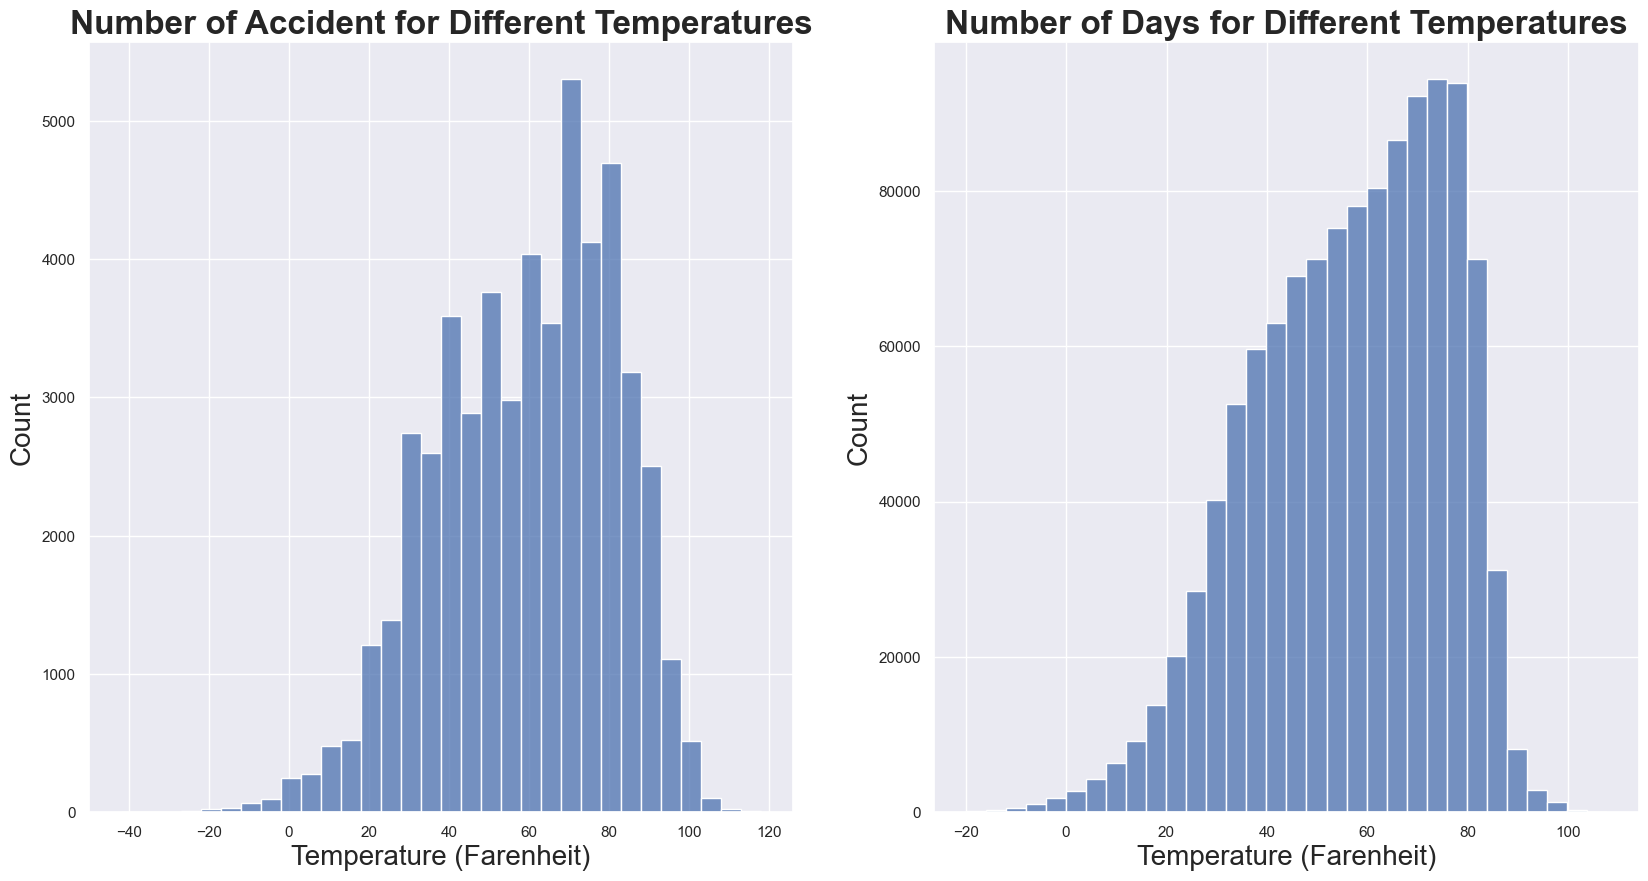

In [32]:
# set figure size
fig, ax = plt.subplots(ncols=2, figsize = ( 20 , 10 ))

# generate the histogram
sns.histplot(data=railroad_cleaned, x='Temperature',bins = 32,ax = ax[0])
sns.histplot(data=temp_df, x='AvgTemperature', bins=32, ax=ax[1])

# set up x,y axes and graph title
ax[0].set_xlabel( "Temperature (Farenheit)" , size = 20 )
ax[0].set_ylabel( "Count" , size = 20)
ax[0].set_title( "Number of Accident for Different Temperatures" , size = 24, fontweight="bold")
ax[1].set_xlabel( "Temperature (Farenheit)" , size = 20 )
ax[1].set_ylabel( "Count" , size = 20)
ax[1].set_title( "Number of Days for Different Temperatures" , size = 24, fontweight="bold" )
plt.show()

- From this histogram we can see that the temperature distribution of railroad accidents matches the overall temperature distribution, suggesting that there does not exist a certain temperature that has high accident rate.

### Generate a histogram to answer the subquestion: Is there a specific time in the day that has higher railroad accidents frequency?
(we think time is also a factor of weather since different times in the day have differnt weather condition)

- Define a fucntion that change the time column of a dataset from string to integer

In [33]:
def standardize_time(s):
    s = s.strip()
    output = 'null'
    if 'AM' in s :
        s = s.replace('AM','')
        s = s.split(":")[0]
        s = s.strip()
        output = int(s)
    elif 'PM' in s:
        s = s.replace('PM','')
        s = s.split(":")[0]
        s = s.strip()
        output = int(s)+12
    else:
        output = np.nan

    return output         

- Apply the function to `railroad_cleaned`

In [34]:
railroad_cleaned['Time'] = railroad_cleaned['Time'].apply(standardize_time)

- Dropna of `railroad_cleaned`

In [35]:
railroad_cleaned = railroad_cleaned.dropna(subset=['Time'])

- Generate the histogram

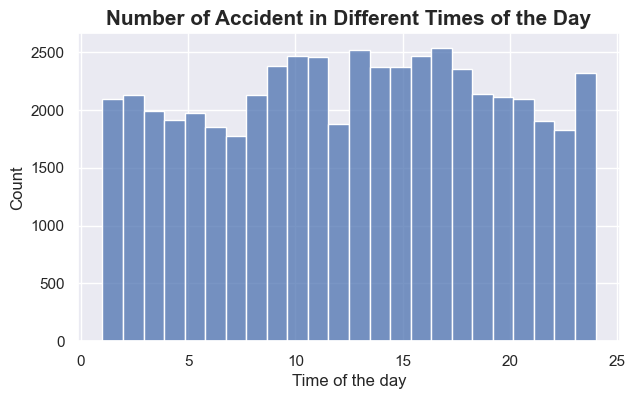

In [36]:
# set figure size
fig, ax = plt.subplots(figsize = ( 7 , 4 ))

# generate histogram
sns.histplot(data=railroad_cleaned,x ='Time',bins=24,ax = ax)
# set up x,y axes names and graph title
ax.set_xlabel( "Time of the day")
ax.set_ylabel( "Count")
ax.set_title( "Number of Accident in Different Times of the Day" , size = 15, fontweight="bold" )
plt.show()

- From the histogram above, we cannot find a specific time that has significantly higher number of accidents than other times, but we do need a statistical test to further rule out the possibility that there is a relationship between times of the day and number of accidents

### Generate a barplot to answer the subquestion: Is visibility also a factor that relates to railroad accidents rate?

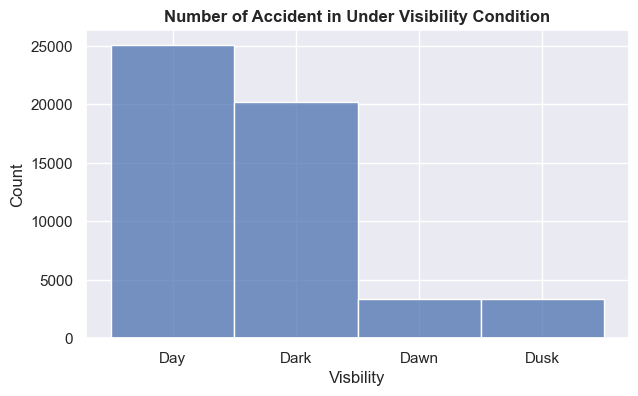

In [37]:
# set figure size
fig, ax = plt.subplots(figsize = ( 7 , 4 ))

# generate the barplot
sns.histplot(data=railroad_cleaned,x ='Visibility',ax=ax)

# set up x,y axes names and graph title
ax.set_xlabel( "Visbility")
ax.set_ylabel( "Count")
ax.set_title( "Number of Accident in Under Visibility Condition", fontweight="bold")
plt.show()

- From the barplot above, we cannot conclude that there is a relationship between visibility and accident frequency since although day and dark seems to have much more accidents, there are many more hours during day and dark compared to dawn and dusk. 

### Generate a barplot to answer the subquestion: Is there a correlation between high and low damage cost accidents and the current weather conditions?

- Define a function that change values in `Total Damage Cost` column from string to int

In [38]:
def standardize_cost(s):
    s = s.strip()
    output = 'null'
    if ',' in s :
        s = s.replace(',','')
        s = s.strip()
        output = int(s)
    else:
        output = int(s)
    return output  

- Apply the fucntion to dataset `railroad_cleaned`

In [39]:
railroad_cleaned['Total Damage Cost'] = railroad_cleaned['Total Damage Cost'].apply(standardize_cost)

- Define a function that return the average damnage cost of each weather event

In [40]:
def average_cost(weather):
    total_cost = railroad_cleaned.loc[railroad_cleaned['Weather Condition'] == weather,:]['Total Damage Cost'].sum()
    total_days = railroad_cleaned.loc[railroad_cleaned['Weather Condition'] == weather,:].shape[0]
    
    average_cost = total_cost/total_days
    
    return average_cost

- Apply the `average_cost` function to each weather event dataframes

In [41]:
average_cost_data = [['Clear',average_cost('Clear')],['Rain',average_cost('Rain')],
                     ['Snow',average_cost('Snow')],['Cloudy',average_cost('Cloudy')],
                    ['Fog',average_cost('Fog')]]
average_cost_data_df = pd.DataFrame(data = average_cost_data, columns = ['Weather','Average Cost'])
average_cost_data_df 

,Weather,Average Cost
0,Clear,126222.752286
1,Rain,158352.735480
2,Snow,131209.842577
3,Cloudy,127229.682669
4,Fog,155793.017730


- Generate a barplot

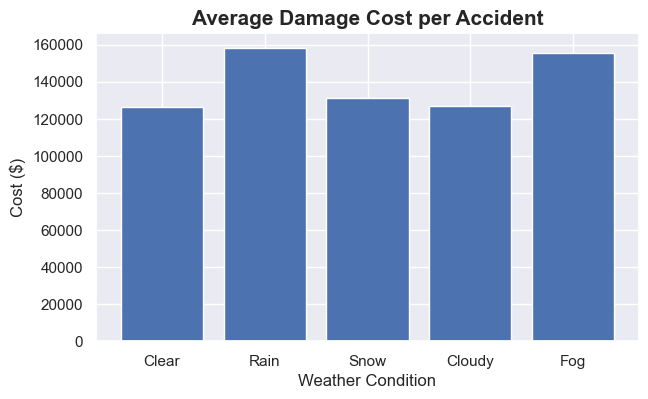

In [42]:
# set up fig size
sns.set(rc={'figure.figsize':(7,4)})

# generate the plot
plt.bar(average_cost_data_df.Weather, average_cost_data_df['Average Cost'])

# set up axes names and graph title
plt.title('Average Damage Cost per Accident', size = 15, fontweight="bold")
plt.xlabel('Weather Condition')
plt.ylabel('Cost ($)')
plt.show()

- We can see that rainy and fog days tend to have higher average costs than other weather; however, we do need to conduct a `t-test` to further confirm the statistical significance of our finding

- Conduct a `t-test`

In [43]:
rain_costs = railroad_cleaned.loc[railroad_cleaned['Weather Condition'] == 'Rain']['Total Damage Cost']
fog_costs = railroad_cleaned.loc[railroad_cleaned['Weather Condition'] == 'Fog']['Total Damage Cost']
snow_costs = railroad_cleaned.loc[railroad_cleaned['Weather Condition'] == 'Snow']['Total Damage Cost']
cloudy_costs = railroad_cleaned.loc[railroad_cleaned['Weather Condition'] == 'Cloudy']['Total Damage Cost']
clear_costs = railroad_cleaned.loc[railroad_cleaned['Weather Condition'] == 'Clear']['Total Damage Cost']

# Combine clear, snow, and cloudy weather costs into a single group
other_weather_costs = pd.concat([clear_costs, snow_costs, cloudy_costs])

# Perform t-tests
t_stat_rain_other, p_value_rain_other = ttest_ind(rain_costs, other_weather_costs)
t_stat_fog_other, p_value_fog_other = ttest_ind(fog_costs, other_weather_costs)

# # Print the results
print("Rain vs. Other Weather")
print("t-statistic:", t_stat_rain_other)
print("p-value:", p_value_rain_other)

print("Fog vs. Other Weather")
print("t-statistic:", t_stat_fog_other)
print("p-value:", p_value_fog_other)

Rain vs. Other Weather
t-statistic: 3.6553563363086554
p-value: 0.00025708029495330535
Fog vs. Other Weather
t-statistic: 1.4169399259586755
p-value: 0.15650692657502832


- For rainy days: We could see that the p-value is less than the commonly used significance level of 0.05. This means that we can reject the null hypothesis and conclude that there is a significant difference between the average costs on rainy days and the average costs on clear, snowy, and cloudy days.

- For foggy days: The p-value is slightly greater than the 0.05 significance level. This means that we cannot reject the null hypothesis and, therefore, cannot conclude that there is a significant difference between the average costs on foggy days and the average costs on clear, snowy, and cloudy days.

# Ethics & Privacy

   We are interested in the relationship between weather variability and extremity and the occurrence of railway accidents, and we think the question asked will not cause ethnic concerns. In terms of the data we use, we will only keep columns that don’t contain any sensitive or private information from our dataset. Our datasets do have limitations and biased data. For instance, most times of the year the weather will be sunny in the majority of States, hence if we just count the number of accidents that happened in various weather conditions we will find way more accidents on sunny days. Therefore, instead of simply analyzing the count of accidents, we need to calculate the percentage of accidents during different weathers. We will keep checking for limitations or biases during communicating our analysis, but we believe our topic area, data, and analyses will not be problematic in terms of data privacy and equitable impact.

# Conclusion & Discussion

### Conclusion

We found that, generally speaking, there is a relationship between railroad accidents and the weather conditions during the accident. To be more specific, we found that foggy weather has a higher accident rate compared to other weather condition. However, we did not expect that clear days also has a higher accident rate since it is not severe weather. This can be due to the fact that trains are more likely to depart on clear days. For instance, maybe trains are not going to depart during extreme weather. Moreover, our hypothesis that there is a specific weather that has a higher railway accidents rate is wrong. There is no relationship between temperature and railroad accident. There is also no not a specific time of the day and visibility that has higher accident rate. However, there is a relationship between weather and damage cost. We found that rainy days have higher damage costs compared to other weather condition.

### Discussion

Limitations: 
1. Different states have their own weather conditions, and our data might be too small for analysis in some particular states where the weather data is a bit extreme, for instance, in Arkansas, there were only 4 fog days over the span of 23 years. Hence every accident that happens on fog days will significantly increase the accident percentage for Arkansas. To prevent these outliers from interfering with our analysis, we only kept data within three standard deviations and discarded the outliers. In addition, we collected the weather data state by state, but in reality, different parts of a state can have distinct weather conditions. Ideally speaking we should collect the weather conditions city by city for precision, but we couldn't find such dataset and it's not realistic to analyze it.
2. We only have the date for number of accident happened under each weather condition and does not have the total number of train departed under each weather condition. Then, if it is equally likely for each train to have accident under any weather condition, then the weather with more train departed, such as clear days by common senses, may have a higher accident rate by the method we use as well.
3. The overall weather dataset is not free therefore we only had 5 years instead of all years starting from 2000. However, the climate change have a great impact on weather during these years and our representation of the weather distribution may not be accurate.

# Team Contributions

The groupwork for this project was distributed among our group of five with a focus on the following: 

Haiqi Zhang: Finding data, slides, data analysis, proofreading, "datasets" and "conclusion" 

Jiayi Dong: Finding data, data cleaning, data analysis, formatting,  "discussion"

Yuqin Zhang: Data cleaning, data analysis, "overview"

Kevin Zhou: "ethics & privacy", slides, "discussion" 

Sixian Li: "prior works & background", "hypothesis",  "contributions"

Everyone participated in deciding on the research questions, EDA Checkpoints, as well as generating graphs and analyzing them.


# Video Link (Google Drive)


https://drive.google.com/file/d/1ab96_CDKb2Ib1L5Ncf5I8Gh56sKCkYsH/view?usp=sharing